<a href="https://colab.research.google.com/github/vantong2001/Nguyen-Van-Tong---19146279/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout, LSTM, BatchNormalization, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data_breast_cancer/train_data',
                                               target_size = (128,128),
                                               batch_size = 32,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data_breast_cancer/train_data',
                                               target_size = (128,128),
                                               batch_size = 32,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)

Found 2559 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       7

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(training_set, batch_size=32, epochs=100, verbose=1, validation_data=validation_set)

Epoch 1/100
80/80 [==============================] - 451s 5s/step - loss: 1.3132 - accuracy: 0.3689 - val_loss: 1.0994 - val_accuracy: 0.3428
Epoch 2/100
80/80 [==============================] - 60s 757ms/step - loss: 1.0891 - accuracy: 0.3884 - val_loss: 1.1540 - val_accuracy: 0.3286
Epoch 3/100
80/80 [==============================] - 61s 759ms/step - loss: 1.0804 - accuracy: 0.3931 - val_loss: 1.1371 - val_accuracy: 0.3569
Epoch 4/100
80/80 [==============================] - 60s 749ms/step - loss: 1.0630 - accuracy: 0.4463 - val_loss: 1.1465 - val_accuracy: 0.3216
Epoch 5/100
80/80 [==============================] - 60s 751ms/step - loss: 1.0482 - accuracy: 0.4564 - val_loss: 1.0913 - val_accuracy: 0.3357
Epoch 6/100
80/80 [==============================] - 61s 760ms/step - loss: 1.0160 - accuracy: 0.4912 - val_loss: 1.2276 - val_accuracy: 0.3852
Epoch 7/100
80/80 [==============================] - 60s 747ms/step - loss: 0.9638 - accuracy: 0.5307 - val_loss: 1.1593 - val_accuracy: 0

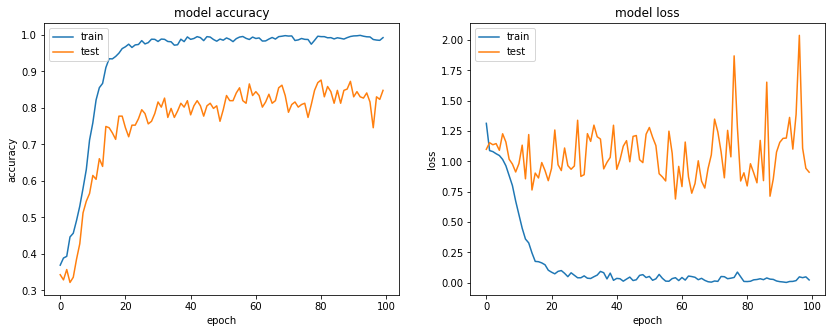

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9925752282142639
validation_accuracy 0.8480565547943115


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data_breast_cancer/test_data',
                                               target_size = (128,128),
                                               batch_size = 32)
model.evaluate(test_set)

Found 30 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step - loss: 0.5042 - accuracy: 0.9333


[0.5042001008987427, 0.9333333373069763]

In [ ]:
model.save("cancer.h5")

In [ ]:
validation_set.class_indices

{'benign_cases': 0, 'malignant_cases': 1, 'normal_cases': 2}

In [ ]:
label = ['benign_cases', 'malignant_cases', 'normal_cases']

normal_cases


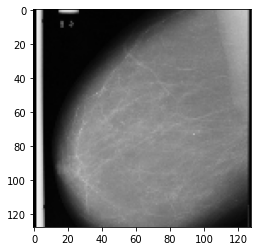

In [ ]:
img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/normal_cases/bth (1).png', target_size = (128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

In [ ]:
for i in range(10):
  i=i+1
  img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/benign_cases/nhe ('+str(i)+').png', target_size = (128,128,3))
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  img = img.astype('float32')
  img = img/255
  print(label[np.argmax(model.predict(img))])

benign_cases
benign_cases
benign_cases
benign_cases
benign_cases
normal_cases
benign_cases
benign_cases
benign_cases
benign_cases


In [ ]:
for i in range(10):
  i=i+1
  img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/malignant_cases/nang ('+str(i)+').png', target_size = (128,128,3))
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  img = img.astype('float32')
  img = img/255
  print(label[np.argmax(model.predict(img))])

malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases
malignant_cases


In [ ]:
for i in range(10):
  i=i+1
  img = load_img('/content/drive/MyDrive/data_breast_cancer/test_data/normal_cases/bth ('+str(i)+').png', target_size = (128,128,3))
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  img = img.astype('float32')
  img = img/255
  print(label[np.argmax(model.predict(img))])

normal_cases
normal_cases
benign_cases
normal_cases
normal_cases
normal_cases
normal_cases
normal_cases
normal_cases
normal_cases
